In [1]:
# Choose geoprocessing kernel
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import warnings
import os
import geopandas as gpd
import shapely
import rasterio 
import pickle
import seaborn as sns

from rasterio.features import geometry_mask
from PIL import Image

In [20]:
site = 'Peel' # tuktoyaktuk

name1= 'Sophia'
name2 = 'Kathrin'
name3 ='Philipp'
if site == 'Peel':
    lab1 = pd.read_csv(f"Aggregated_{name1}.csv")
    lab2 = pd.read_csv(f"Aggregated_{name2}.csv")
    lab3 = pd.read_csv(f"Aggregated_{name3}.csv")
    lab3 = lab3[lab3['year_end'] != 2021]
else:
    lab1 = pd.read_csv(f"{site}_{name1}.csv")
    lab2 = pd.read_csv(f"{site}_{name2}.csv")
    lab3 = pd.read_csv(f"{site}_{name3}.csv")


In [21]:
for lab in [lab1, lab2, lab3]:
    if not len(lab1) == len(np.unique(lab1.id)):
        print('error: RTS are not unique: Check weighted mean processing')

***
Get min max, mean values

In [31]:
# Get min max, mean values
if site == 'Peel':
    lab1_min = lab1.loc[:,['area', 'norm_n_pixel','perimeter','solidity', 'circularity', 'diameter_max', 'n_vertices', 'norm_mean', 'norm_std', 'norm_var','norm_median','norm_coeff_var','diff_mean','diff_std','diff_var','diff_median','diff_coeff_var','diff_n_pixel']].min().round(2)
    lab1_max = lab1.loc[:,['area', 'norm_n_pixel','perimeter','solidity', 'circularity', 'diameter_max', 'n_vertices', 'norm_mean', 'norm_std', 'norm_var','norm_median','norm_coeff_var','diff_mean','diff_std','diff_var','diff_median','diff_coeff_var','diff_n_pixel']].max().round(2)
    lab1_mean = lab1.loc[:,['area', 'norm_n_pixel','perimeter','solidity', 'circularity', 'diameter_max', 'n_vertices', 'norm_mean', 'norm_std', 'norm_var','norm_median','norm_coeff_var','diff_mean','diff_std','diff_var','diff_median','diff_coeff_var','diff_n_pixel']].mean().round(2)
    lab1_std = lab1.loc[:,['area', 'norm_n_pixel','perimeter','solidity', 'circularity', 'diameter_max', 'n_vertices', 'norm_mean', 'norm_std', 'norm_var','norm_median','norm_coeff_var','diff_mean','diff_std','diff_var','diff_median','diff_coeff_var','diff_n_pixel']].std().round(2)
    lab1_median = lab1.loc[:,['area', 'norm_n_pixel','perimeter','solidity', 'circularity', 'diameter_max', 'n_vertices', 'norm_mean', 'norm_std', 'norm_var','norm_median','norm_coeff_var','diff_mean','diff_std','diff_var','diff_median','diff_coeff_var','diff_n_pixel']].median().round(2)

    
    lab2_min = lab2.loc[:,['area', 'norm_n_pixel','perimeter','solidity', 'circularity', 'diameter_max', 'n_vertices', 'norm_mean', 'norm_std', 'norm_var','norm_median','norm_coeff_var','diff_mean','diff_std','diff_var','diff_median','diff_coeff_var','diff_n_pixel']].min().round(2)
    lab2_max = lab2.loc[:,['area', 'norm_n_pixel','perimeter','solidity', 'circularity', 'diameter_max', 'n_vertices', 'norm_mean', 'norm_std', 'norm_var','norm_median','norm_coeff_var','diff_mean','diff_std','diff_var','diff_median','diff_coeff_var','diff_n_pixel']].max().round(2)
    lab2_mean = lab2.loc[:,['area', 'norm_n_pixel','perimeter','solidity', 'circularity', 'diameter_max', 'n_vertices', 'norm_mean', 'norm_std', 'norm_var','norm_median','norm_coeff_var','diff_mean','diff_std','diff_var','diff_median','diff_coeff_var','diff_n_pixel']].mean().round(2)
    lab2_std = lab2.loc[:,['area', 'norm_n_pixel','perimeter','solidity', 'circularity', 'diameter_max', 'n_vertices', 'norm_mean', 'norm_std', 'norm_var','norm_median','norm_coeff_var','diff_mean','diff_std','diff_var','diff_median','diff_coeff_var','diff_n_pixel']].std().round(2)
    lab2_median = lab2.loc[:,['area', 'norm_n_pixel','perimeter','solidity', 'circularity', 'diameter_max', 'n_vertices', 'norm_mean', 'norm_std', 'norm_var','norm_median','norm_coeff_var','diff_mean','diff_std','diff_var','diff_median','diff_coeff_var','diff_n_pixel']].median().round(2)

    
    lab3_min = lab3.loc[:,['area', 'norm_n_pixel','perimeter','solidity', 'circularity', 'diameter_max', 'n_vertices', 'norm_mean', 'norm_std', 'norm_var','norm_median','norm_coeff_var','diff_mean','diff_std','diff_var','diff_median','diff_coeff_var','diff_n_pixel']].min().round(2)
    lab3_max = lab3.loc[:,['area', 'norm_n_pixel','perimeter','solidity', 'circularity', 'diameter_max', 'n_vertices', 'norm_mean', 'norm_std', 'norm_var','norm_median','norm_coeff_var','diff_mean','diff_std','diff_var','diff_median','diff_coeff_var','diff_n_pixel']].max().round(2)
    lab3_mean = lab3.loc[:,['area', 'norm_n_pixel','perimeter','solidity', 'circularity', 'diameter_max', 'n_vertices', 'norm_mean', 'norm_std', 'norm_var','norm_median','norm_coeff_var','diff_mean','diff_std','diff_var','diff_median','diff_coeff_var','diff_n_pixel']].mean().round(2)
    lab3_std = lab3.loc[:,['area', 'norm_n_pixel','perimeter','solidity', 'circularity', 'diameter_max', 'n_vertices', 'norm_mean', 'norm_std', 'norm_var','norm_median','norm_coeff_var','diff_mean','diff_std','diff_var','diff_median','diff_coeff_var','diff_n_pixel']].std().round(2)
    lab3_median = lab3.loc[:,['area', 'norm_n_pixel','perimeter','solidity', 'circularity', 'diameter_max', 'n_vertices', 'norm_mean', 'norm_std', 'norm_var','norm_median','norm_coeff_var','diff_mean','diff_std','diff_var','diff_median','diff_coeff_var','diff_n_pixel']].median().round(2)
else:
    # Get min max, mean values
    lab1_min = lab1.loc[:,['area', 'norm_n_pixel','perimeter','solidity', 'circularity', 'diameter_max', 'n_vertices', 'norm_mean', 'norm_std', 'norm_var','norm_median','norm_coeff_var']].min().round(2)
    lab1_max = lab1.loc[:,['area', 'norm_n_pixel','perimeter','solidity', 'circularity', 'diameter_max', 'n_vertices', 'norm_mean', 'norm_std', 'norm_var','norm_median','norm_coeff_var']].max().round(2)
    lab1_mean = lab1.loc[:,['area', 'norm_n_pixel','perimeter','solidity', 'circularity', 'diameter_max', 'n_vertices', 'norm_mean', 'norm_std', 'norm_var','norm_median','norm_coeff_var']].mean().round(2)
    lab1_std = lab1.loc[:,['area', 'norm_n_pixel','perimeter','solidity', 'circularity', 'diameter_max', 'n_vertices', 'norm_mean', 'norm_std', 'norm_var','norm_median','norm_coeff_var']].std().round(2)
    lab1_median = lab1.loc[:,['area', 'norm_n_pixel','perimeter','solidity', 'circularity', 'diameter_max', 'n_vertices', 'norm_mean', 'norm_std', 'norm_var','norm_median','norm_coeff_var']].median().round(2)
   
    lab2_min = lab2.loc[:,['area', 'norm_n_pixel','perimeter','solidity', 'circularity', 'diameter_max', 'n_vertices', 'norm_mean', 'norm_std', 'norm_var','norm_median','norm_coeff_var']].min().round(2)
    lab2_max = lab2.loc[:,['area', 'norm_n_pixel','perimeter','solidity', 'circularity', 'diameter_max', 'n_vertices', 'norm_mean', 'norm_std', 'norm_var','norm_median','norm_coeff_var']].max().round(2)
    lab2_mean = lab2.loc[:,['area', 'norm_n_pixel','perimeter','solidity', 'circularity', 'diameter_max', 'n_vertices', 'norm_mean', 'norm_std', 'norm_var','norm_median','norm_coeff_var']].mean().round(2)
    lab2_std = lab2.loc[:,['area', 'norm_n_pixel','perimeter','solidity', 'circularity', 'diameter_max', 'n_vertices', 'norm_mean', 'norm_std', 'norm_var','norm_median','norm_coeff_var']].std().round(2)
    lab2_median = lab2.loc[:,['area', 'norm_n_pixel','perimeter','solidity', 'circularity', 'diameter_max', 'n_vertices', 'norm_mean', 'norm_std', 'norm_var','norm_median','norm_coeff_var']].median().round(2)

    lab3_min = lab3.loc[:,['area', 'norm_n_pixel','perimeter','solidity', 'circularity', 'diameter_max', 'n_vertices', 'norm_mean', 'norm_std', 'norm_var','norm_median','norm_coeff_var']].min().round(2)
    lab3_max = lab3.loc[:,['area', 'norm_n_pixel','perimeter','solidity', 'circularity', 'diameter_max', 'n_vertices', 'norm_mean', 'norm_std', 'norm_var','norm_median','norm_coeff_var']].max().round(2)
    lab3_mean = lab3.loc[:,['area', 'norm_n_pixel','perimeter','solidity', 'circularity', 'diameter_max', 'n_vertices', 'norm_mean', 'norm_std', 'norm_var','norm_median','norm_coeff_var']].mean().round(2)
    lab3_std = lab3.loc[:,['area', 'norm_n_pixel','perimeter','solidity', 'circularity', 'diameter_max', 'n_vertices', 'norm_mean', 'norm_std', 'norm_var','norm_median','norm_coeff_var']].std().round(2)
    lab3_median = lab3.loc[:,['area', 'norm_n_pixel','perimeter','solidity', 'circularity', 'diameter_max', 'n_vertices', 'norm_mean', 'norm_std', 'norm_var','norm_median','norm_coeff_var']].median().round(2)
   

In [32]:
if site == 'Peel':
    indexdf = ['Area [m2]', 'Number of pixels', 'Perimeter [m]', 'Solidity', 'Circularity', 'Max. diameter', 'Number of vertices', 'Mean', 'Standard deviation','Variance','Median','Coefficient of variation', '2Mean', '2Standard deviation','2Variance','2Median','2Coefficient of variation']
else:
    indexdf = ['Area [m2]', 'Number of pixels', 'Perimeter [m]', 'Solidity', 'Circularity', 'Max. diameter', 'Number of vertices', 'Mean', 'Standard deviation','Variance','Median','Coefficient of variation']
columnsdf = ['min','median', 'max', 'mean', 'std']
df_ = pd.DataFrame(columns=columnsdf)
i = 0

for labelerx in [lab3_min, lab3_median, lab3_max, lab3_mean, lab3_std]: # [lab1_min, lab1_median, lab1_max, lab1_mean, lab1_std], [lab2_min, lab2_median, lab2_max, lab2_mean, lab2_std], [lab3_min, lab3_median, lab3_max, lab3_mean, lab3_std]
    if site == 'Peel':
        data = [labelerx.area, labelerx.norm_n_pixel, labelerx.perimeter, labelerx.solidity, labelerx.circularity, labelerx.diameter_max, labelerx.n_vertices, labelerx.norm_mean, labelerx.norm_std, labelerx.norm_var, labelerx.norm_median, labelerx.norm_coeff_var, labelerx.diff_mean, labelerx.diff_std, labelerx.diff_var, labelerx.diff_median, labelerx.diff_coeff_var]
    else:
        data = [labelerx.area, labelerx.norm_n_pixel, labelerx.perimeter, labelerx.solidity, labelerx.circularity, labelerx.diameter_max, labelerx.n_vertices, labelerx.norm_mean, labelerx.norm_std, labelerx.norm_var, labelerx.norm_median, labelerx.norm_coeff_var]
    serie_i = pd.Series(data,  indexdf)
    df_[columnsdf[i]] = serie_i
    i+=1

***
Visualization feature distribution


In [34]:
xlabel = ['Area [m²]', 'Number of pixels','Perimeter [m]','Solidity', 'Circularity', 'Max. diameter', 'Number of vertices', 'Mean per RTS', 'Std. per RTS', 'Var. per RTS','Median per RTS','Coefficient of variation per RTS']
feature = ['area', 'norm_n_pixel','perimeter','solidity', 'circularity', 'diameter_max', 'n_vertices', 'norm_mean', 'norm_std', 'norm_var','norm_median','norm_coeff_var']

In [ ]:
# Save figure of each feature
for i in range(len(xlabel)): #(len(xlabel)):
    bin_start = round(min(min(lab1[feature[i]]), min(lab2[feature[i]]), min(lab3[feature[i]])),1)
    bin_end = round(max(max(lab1[feature[i]]), max(lab2[feature[i]]), max(lab3[feature[i]])),1)

    bin_diff = abs(bin_end-bin_start)

    # Set granularity of bin 
    if bin_diff <= 0.3:
        bin_step = round((bin_diff/25) / 0.01) * 0.01
        # bin_diff Value is too small and rounded to 0
        if bin_step == 0:
            bin_step = 0.01
    elif bin_diff <= 0.7:
        bin_step = round((bin_diff/25) / 0.02) * 0.02
        # bin_diff Value is too small and rounded to 0
        if bin_step == 0:
            bin_step = 0.02
    elif bin_diff <= 1.5:
        bin_step = round((bin_diff/25) / 0.05) * 0.05
        if bin_step == 0:
            bin_step = 0.05
    elif bin_diff <= 3:
        bin_step = round((bin_diff/25) / 0.1) * 0.1
        if bin_step == 0:
            bin_step = 0.1
    elif bin_diff <= 4.5:
        bin_step = round((bin_diff/25) / 0.15) * 0.15
        if bin_step == 0:
            bin_step = 0.15
    elif bin_diff <= 10:
        bin_step = round((bin_diff/25)/ 0.2) * 0.2
        if bin_step == 0:
            bin_step = 0.2     
    elif bin_diff <= 12:
        bin_step = round((bin_diff/25)/ 0.5) * 0.5
        if bin_step == 0:
            bin_step = 0.5
    else:
        bin_step = (bin_diff) / 25

    bins =  np.arange(bin_start, bin_end, bin_step)
    
    # Get figure
    fig, ax1 = plt.subplots()
    sns.histplot(lab1, x = feature[i], color = 'blue', kde=True, alpha = 0, bins=bins)
    hatch_pattern = '...'  # Replace this with the desired pattern
    for bar in ax1.patches:
        bar.set_hatch(hatch_pattern)
        bar.set_edgecolor('royalblue') # royalblue, cornflowerblue
    sns.histplot(lab2, x = feature[i], color = 'green', kde=True,alpha = 0.3, bins=bins)
    sns.histplot(lab3, x = feature[i], color = 'orange', kde=True,alpha = 0.4, bins=bins)
    ax1.set_xlabel(xlabel[i]) #Area [m²]
    ax1.set_ylabel(r'Occurence')
    ax1.legend(['Labeler 1','Labeler 2','Labeler 3'])
    plt.savefig(f'Compare_{feature[i]}_{site}_2016.png', format='png', dpi=300)
    #plt.savefig('Compare_n_vertices_{site}.svg', format='svg')

    plt.xlim(0, 100)
    plt.title("Number of vertices, x axis limited to 100")
    plt.savefig('Compare_n_vertices_cropped.png', format='png', dpi=300)
    #plt.savefig('Compare_n_vertices_cropped.svg', format='svg')

#plt.show()

c:\Users\sophi\anaconda3\envs\geoprocessing\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sophi\anaconda3\envs\geoprocessing\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sophi\anaconda3\envs\geoprocessing\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sophi\anaconda3\envs\geoprocessing\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

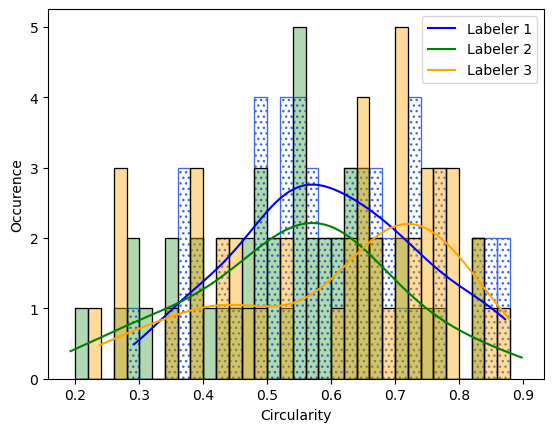

***
Visualisation IoU vs median

In [83]:
# Datasets to be compared
site_name = "Herschel" #tuktoyaktuk, taymyr, kolguev, Herschel

# name = "Sophia"
# lab1_name = 'labeler 1'
# name2 = "Kathrin"
# lab2_name = 'labeler 2'


name = "Kathrin"
lab1_name = 'labeler 2'
name2 = "Philipp"
lab2_name = 'labeler 3'


# name = "Sophia"
# lab1_name = 'labeler 1'
# name2 = "Philipp"
# lab2_name = 'labeler 3'




In [84]:
if site_name == 'Peel':
    iou_values = pd.read_csv(f"{name}_{name2}_iou_raw.csv")
    iou_unique = pd.read_csv(f"{name}_{name2}_iou_paired.csv")
else:
    iou_unique = pd.read_csv(f"{site_name}_{name}_{name2}_iou_paired.csv")
    iou_values = pd.read_csv(f"{site_name}_{name}_{name2}_iou_raw.csv")

if site_name == "Peel":
    lab1 = pd.read_csv(f"Aggregated_{name}.csv")
    lab2 = pd.read_csv(f"Aggregated_{name2}.csv")
else:
    lab1 = pd.read_csv(f"{site_name}_{name}.csv")
    lab2 = pd.read_csv(f"{site_name}_{name2}.csv")
print(len(iou_unique))

38


In [85]:
# Get RTS feature per IoU
merged_df1 = iou_unique.merge(lab1.add_prefix('1_')[['1_id', '1_geometry', '1_area', '1_perimeter', '1_circularity', '1_solidity', '1_diameter_max', '1_n_vertices', '1_norm_std', '1_norm_median','1_norm_mean']],
                              left_on='polygon1_id', right_on='1_id', how='left')

merged_df = merged_df1.merge(lab2.add_prefix('2_')[['2_id', '2_geometry', '2_area', '2_perimeter', '2_circularity', '2_solidity', '2_diameter_max', '2_n_vertices', '2_norm_std', '2_norm_median','2_norm_mean']],
                              left_on='polygon2_id', right_on='2_id', how='left')
merged_df.to_csv(f"{lab1_name} vs. {lab2_name} on {site_name_}.csv", index=True)

38


In [71]:
# Get info on 1:1 matching
merged_df_herschel = merged_df
# merged_df_taymyr = merged_df
# merged_df_tuktoyaktuk = merged_df
# merged_df_kolguev = merged_df
# merged_df_herschel = merged_df
# merged_df_Peel = merged_df
print(len(merged_df_tuktoyaktuk), len(merged_df_taymyr), len(merged_df_kolguev), len(merged_df_herschel), len(merged_df_tuktoyaktuk)+len(merged_df_taymyr)+len(merged_df_kolguev) + len(merged_df_herschel))
merged_df = pd.concat([merged_df_taymyr, merged_df_tuktoyaktuk, merged_df_kolguev, merged_df_herschel])
print(len(merged_df))

85 20 9 46 160
160


c:\Users\sophi\anaconda3\envs\geoprocessing\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sophi\anaconda3\envs\geoprocessing\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


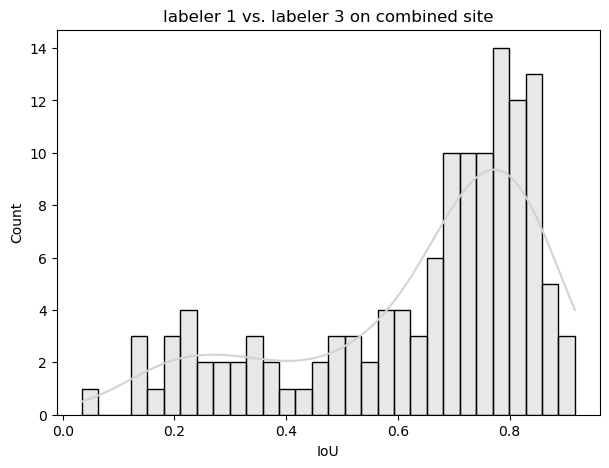

In [53]:
# check relationship between feature and IoU
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
site_name_ = 'combined site' #Tuktoyaktuk, all study sites


fig, ax1 = plt.subplots(figsize=(7, 5))
sns.histplot(merged_df['IoU'], bins=30, kde=True, stat='count', ax=ax1, color='lightgrey')
ax1.set_xlabel('IoU')

plt.title(f"{lab1_name} vs. {lab2_name} on {site_name_}")
plt.savefig(f'IoU_{lab2_name}_{lab1_name}_tot.png', format='png', dpi=300)
# plt.savefig(f'IoU_{lab2_name}_{lab1_name}_{feature_}.svg', format='svg')


plt.show()

C:\Users\sophi\AppData\Local\Temp\ipykernel_3272\1556634260.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_by_iou = merged_df.groupby(pd.cut(merged_df['IoU'], bins=30))[f'1_{feature_}'].mean()
c:\Users\sophi\anaconda3\envs\geoprocessing\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sophi\anaconda3\envs\geoprocessing\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


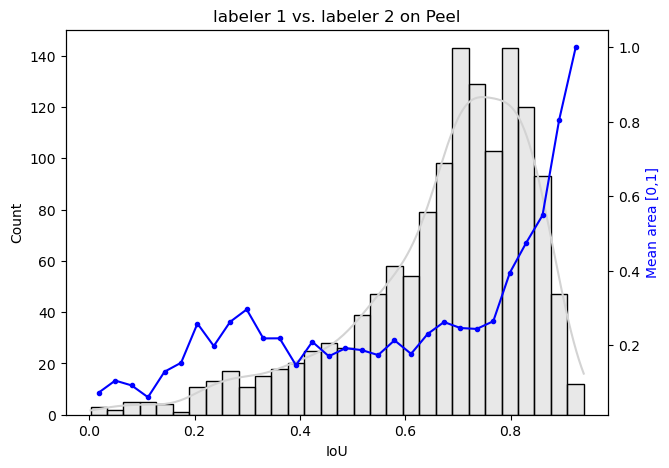

In [366]:
# check relationship between feature and IoU
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
site_name_ = 'Peel' #Tuktoyaktuk, all study sites
feature_ = 'area'# area norm_mean, circularity, solidity, norm_std
feature_name = 'area [0,1]' #Area [m²], per RTS for normed DEM, for difference DEM
# Calculate the median of 'area' for each 'IoU' bin
median_by_iou = merged_df.groupby(pd.cut(merged_df['IoU'], bins=30))[f'1_{feature_}'].mean()
# Get iou value for corresponding median (index of iou)
id_median = pd.IntervalIndex(median_by_iou.index).mid
# normalize
median_normed = median_by_iou / median_by_iou.max()

fig, ax1 = plt.subplots(figsize=(7, 5))
sns.histplot(merged_df['IoU'], bins=30, kde=True, stat='count', ax=ax1, color='lightgrey')
ax1.set_xlabel('IoU')

# Create a second y-axis for the median of 'area' for each 'IoU' bin
ax2 = ax1.twinx()

# Plot the median of 'area' for each 'IoU' bin on the second y-axis
ax2.plot(id_median, median_normed.values, marker='.', color='blue', label=f'Median {feature_name} by IoU')
ax2.set_ylabel(f'Mean {feature_name}', color = 'blue')

plt.title(f"{lab1_name} vs. {lab2_name} on {site_name_}")
plt.savefig(f'IoU_{lab2_name}_{lab1_name}_{feature_}_{site_name_}.png', format='png', dpi=300)
# plt.savefig(f'IoU_{lab2_name}_{lab1_name}_{feature_}.svg', format='svg')


plt.show()

In [92]:
compare1 = pd.read_csv(f"labeler 1 vs. labeler 2 on combined site.csv")
compare2 = pd.read_csv(f"labeler 2 vs. labeler 3 on combined site.csv")
compare3 = pd.read_csv(f"labeler 1 vs. labeler 3 on combined site.csv")

c:\Users\sophi\anaconda3\envs\geoprocessing\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sophi\anaconda3\envs\geoprocessing\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sophi\anaconda3\envs\geoprocessing\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sophi\anaconda3\envs\geoprocessing\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

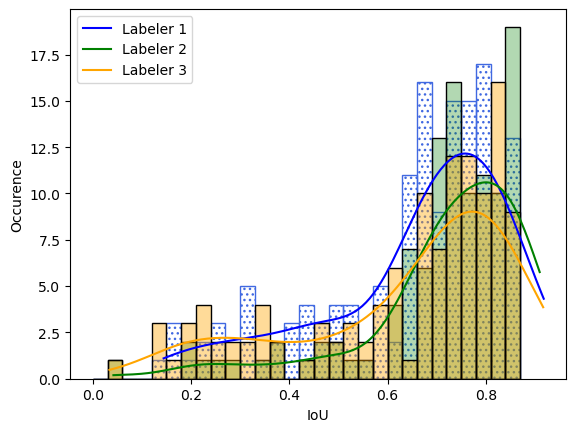

In [113]:
bin_start = round(min(min(compare1.IoU), min(compare2.IoU), min(compare3.IoU)),1)
bin_end = round(max(max(compare1.IoU), max(compare2.IoU), max(compare3.IoU)),1)

bin_diff = abs(bin_end-bin_start)

bin_step = (bin_diff) / 30

bins =  np.arange(bin_start, bin_end, bin_step)

# Get figure
fig, ax1 = plt.subplots()
sns.histplot(compare1.IoU, color = 'blue', kde=True, alpha = 0, bins=bins)
hatch_pattern = '...'  # Replace this with the desired pattern
for bar in ax1.patches:
    bar.set_hatch(hatch_pattern)
    bar.set_edgecolor('royalblue') # royalblue, cornflowerblue
sns.histplot(compare2.IoU, color = 'green', kde=True,alpha = 0.3, bins=bins)
sns.histplot(compare3.IoU, color = 'orange', kde=True,alpha = 0.4, bins=bins)
ax1.set_ylabel(r'Occurence')
ax1.legend(['Labeler 1','Labeler 2','Labeler 3'])
plt.savefig(f'Compare_IoU.png', format='png', dpi=300)
#plt.savefig('Compare_n_vertices_{site}.svg', format='svg')

# plt.xlim(0, 100)
# plt.title("Number of vertices, x axis limited to 100")
# plt.savefig('Compare_n_vertices_cropped.png', format='png', dpi=300)
#plt.savefig('Compare_n_vertices_cropped.svg', format='svg')


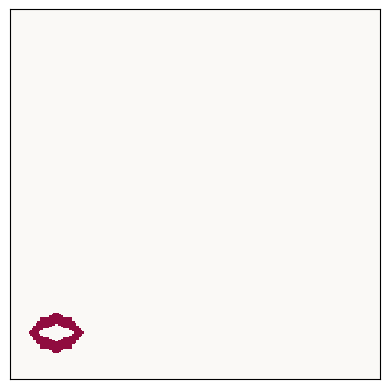

In [ ]:
img_array = np.array(Image.open(os.path.join(path_, '2011-2016_tile_16_41_10_3_6_1_zoomout.tif'))) 
from matplotlib import colors
cmap = colors.ListedColormap(['#FAF9F6','b','y','g','#900C3F'])
fig, ax = plt.subplots()
ax.imshow(img_array, interpolation='nearest', cmap=cmap)
ax.set_xticks([])
ax.set_yticks([])
plt.show()